
# HYPOTHESIS TESTING

Hypothesis testing is an act in statistics whereby an analyst testsan assumption regarding a population parameter. The methodology employed by the analyst depends on the nature of the data used and the reason for the analysis. Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data. Such data may come from a larger population, or from a data-generating process.

![Alt Text](https://economicshelpdesk.com/statistics/images/hypothesis-testing-homework-help.jpg)

 # Understanding the Hypothesis Testing

Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [39]:
#importing libraries
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.stats import norm

>**Q1 :** Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?


In [40]:
# t-score for normal distribution
def t_score(sample_size,sample_mean,pop_mean,sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std / sample_size**0.5
    return numerator/denominator

<font> Step 1: </font>

Null hypothesis($H_0$): mean =500 (every packet has 500 grams)

Alternate hypothesis($H_1$):mean $\ \neq $ 500 (not every packet has 500 grams)

<font> Step 2: </font>

Collecting the sample size: 

[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

In [41]:
#computing the sample mean of sample given above:
sample=[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
mean=sum(sample)/len(sample)
mean

465.3

In [42]:
#calculating the standard deviation of the sample
std=np.std(sample)
std

82.3918078451978

In [43]:
#calculating t score
sample_size=10
sample_mean=mean
population_mean=500
sample_std=std
tscore = t_score(sample_size,sample_mean,population_mean,sample_std)
print(tscore)

-1.3318197242863192


In [44]:
#two tail
df = 9
alpha = 1 - 0.95  #confidence_level=0.95
tcritical = t.ppf(1-alpha/2,df)
print(tcritical)

2.2621571627409915


Text(465.3, 0.0007, 'x_bar')

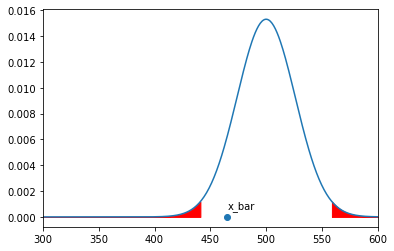

In [45]:
#plotting the sample distribution with rejection region
x_min = 300
x_max = 600

#defining sample mean and sample std
mean1 = population_mean
std1 = sample_std/ sample_size**0.5

#plotting the graph and setting limits
x = np.linspace(x_min,x_max,400)
y = norm.pdf(x, mean1 ,std1)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing the left and right critical values
t_critical_left = population_mean + (-tcritical*std1)
t_critical_right = population_mean + (tcritical*std1)

#Shading the left rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean1,std1)
plt.fill_between(x1,y1,color='red')

#Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x2,mean1,std1)
plt.fill_between(x2,y2,color='red')

#plotting the sample mean
plt.scatter(sample_mean,0)
plt.annotate('x_bar',(sample_mean,0.0007))

In [46]:
#conclusion using t-test
if(np.abs(tscore)<tcritical):
    print("Failed to reject null hypothesis")
else:
    print("Reject null hypothesis")

Failed to reject null hypothesis


>**Q2 :** You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

<font> Step 1: </font>

Null hypothesis($H_0$): User rating <= 4

Alternate hypothesis($H_1$):User rating > 4

<font> Step 2: </font>

Collecting the sample size: 

[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

In [47]:
#computing the sample mean of sample given above:
sample=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
mean=sum(sample)/len(sample)
mean

4.25

In [48]:
#calculating the standard deviation of the sample
std=np.std(sample)
std

0.82915619758885

In [49]:
#calculating t score
sample_size=20
sample_mean=mean
population_mean=4
sample_std=std
tscore = t_score(sample_size,sample_mean,population_mean,sample_std)
print(tscore)


1.3483997249264843


In [50]:
#two tail
df = 19
alpha = 1 - 0.95  #confidence_level=0.95
tcritical = t.ppf(1-alpha,df)
print(tcritical)

1.729132811521367


Text(4.25, 0.0007, 'x_bar')

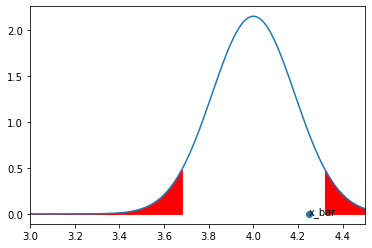

In [52]:
#plotting the sample distribution with rejection region
x_min = 3
x_max = 4.5

#defining sample mean and sample std
mean1 = population_mean
std1 = sample_std/ sample_size**0.5

#plotting the graph and setting limits
x = np.linspace(x_min,x_max,400)
y = norm.pdf(x, mean1 ,std1)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing the left and right critical values
t_critical_left = population_mean + (-tcritical*std1)
t_critical_right = population_mean + (tcritical*std1)

#Shading the left rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean1,std1)
plt.fill_between(x1,y1,color='red')

#Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x2,mean1,std1)
plt.fill_between(x2,y2,color='red')

#plotting the sample mean
plt.scatter(sample_mean,0)
plt.annotate('x_bar',(sample_mean,0.0007))

In [53]:
#conclusion using t-test
if(np.abs(tscore)<tcritical):
    print("Failed to reject null hypothesis")
else:
    print("Reject null hypothesis")

Failed to reject null hypothesis


>**Q3 :** TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?




<font> Step 1: </font>

Null hypothesis($H_0$): Average mileage is not greater than 15km litre

Alternate hypothesis($H_1$):Average mileage is atleast 15km litre

<font> Step 2: </font>

Collecting the sample size: 

[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]

In [54]:
#computing the sample mean of sample given above:
sample=[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
mean=sum(sample)/len(sample)
mean

15.098999999999998

In [55]:
#calculating the standard deviation of the sample
std=np.std(sample)
std

0.9994043225842081

In [56]:
#calculating t score
sample_size=20
sample_mean=mean
population_mean=15
sample_std=std
tscore = t_score(sample_size,sample_mean,population_mean,sample_std)
print(tscore)


0.44300534782572615


In [57]:
#two tail
df = 19
alpha = 1 - 0.95  #confidence_level=0.95
tcritical = t.ppf(1-alpha,df)
print(tcritical)

1.729132811521367


Text(15.098999999999998, 0.0007, 'x_bar')

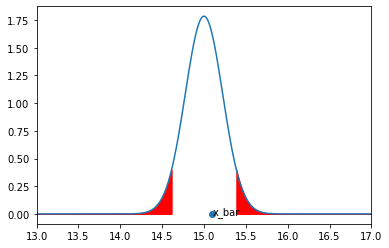

In [58]:
#plotting the sample distribution with rejection region
x_min = 13
x_max = 17

#defining sample mean and sample std
mean1 = population_mean
std1 = sample_std/ sample_size**0.5

#plotting the graph and setting limits
x = np.linspace(x_min,x_max,400)
y = norm.pdf(x, mean1 ,std1)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing the left and right critical values
t_critical_left = population_mean + (-tcritical*std1)
t_critical_right = population_mean + (tcritical*std1)

#Shading the left rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean1,std1)
plt.fill_between(x1,y1,color='red')

#Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x2,mean1,std1)
plt.fill_between(x2,y2,color='red')

#plotting the sample mean
plt.scatter(sample_mean,0)
plt.annotate('x_bar',(sample_mean,0.0007))

In [59]:
#conclusion using t-test
if(np.abs(tscore)<tcritical):
    print("Failed to reject null hypothesis")
else:
    print("Reject null hypothesis")

Failed to reject null hypothesis


>**Q4 :** You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim


<font> Step 1: </font>

Null hypothesis($H_0$): prediction time > 4

Alternate hypothesis($H_1$):prediction time <= 4

<font> Step 2: </font>

Collecting the sample size: 

[109,98,86,119,88,97,94,96,118,101,104,108,99,92,81,115,106,101,111,90]

In [61]:
#computing the sample mean of sample given above:
sample=[109,98,86,119,88,97,94,96,118,101,104,108,99,92,81,115,106,101,111,90]
mean=sum(sample)/len(sample)
mean

100.65

In [62]:
#calculating the standard deviation of the sample
std=np.std(sample)
std

10.374367450596688

In [69]:
#calculating t score
sample_size=20
sample_mean=mean
population_mean=100
sample_std=std
tscore = t_score(sample_size,sample_mean,population_mean,sample_std)
print(tscore)


0.2801990949898888


In [73]:
#two tail
df = 19
alpha = 1 - 0.95  #confidence_level=0.95
tcritical = t.ppf(1-alpha,df)
print(tcritical)

1.729132811521367


Text(100.65, 0.0007, 'x_bar')

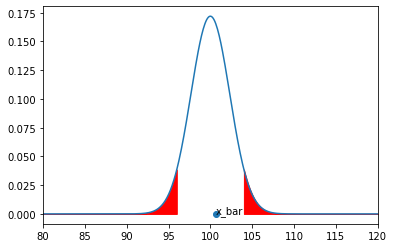

In [74]:
#plotting the sample distribution with rejection region
x_min = 80
x_max = 120

#defining sample mean and sample std
mean1 = population_mean
std1 = sample_std/ sample_size**0.5

#plotting the graph and setting limits
x = np.linspace(x_min,x_max,400)
y = norm.pdf(x, mean1 ,std1)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing the left and right critical values
t_critical_left = population_mean + (-tcritical*std1)
t_critical_right = population_mean + (tcritical*std1)

#Shading the left rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean1,std1)
plt.fill_between(x1,y1,color='red')

#Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x2,mean1,std1)
plt.fill_between(x2,y2,color='red')

#plotting the sample mean
plt.scatter(sample_mean,0)
plt.annotate('x_bar',(sample_mean,0.0007))

In [75]:
#conclusion using t-test
if(np.abs(tscore)<tcritical):
    print("Failed to reject null hypothesis")
else:
    print("Reject null hypothesis")

Failed to reject null hypothesis
